In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
alzheimers = pd.read_csv('Alzheimers_data.csv')

In [3]:
len(alzheimers)

46676

In [4]:
pd.options.display.max_columns = 38
pd.options.display.max_columns
pd.set_option('max_colwidth', 100)


In [5]:
alzheimers.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Response', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'ResponseID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3', 'Report'],
      dtype='object')

In [6]:
#alzheimers[alzheimers['LocationAbbr'] == 'GA']
alzheimers[np.logical_and(alzheimers['Question'] == 'Percentage of older adults who have not had any leisure time physical activity in the past month', alzheimers['LocationAbbr'] == 'GA')].sort_values(by = 'YearStart') 


YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
16223       2011     2011           GA      Georgia      BRFSS   
2073        2011     2011           GA      Georgia      BRFSS   
36808       2011     2011           GA      Georgia      BRFSS   
39299       2011     2011           GA      Georgia      BRFSS   
5121        2012     2012           GA      Georgia      BRFSS   
6871        2012     2012           GA      Georgia      BRFSS   
39148       2012     2012           GA      Georgia      BRFSS   
9841        2012     2012           GA      Georgia      BRFSS   
44665       2013     2013           GA      Georgia      BRFSS   
85          2013     2013           GA      Georgia      BRFSS   
44374       2013     2013           GA      Georgia      BRFSS   
32570       2013     2013           GA      Georgia      BRFSS   
7643        2014     2014           GA      Georgia      BRFSS   
3953        2014     2014           GA      Georgia      BRFSS   
29882       2014     2014           GA      Georgia      BRFSS   
32713       2014     2014           GA      Georgia      BRFSS   
38480       2015     2015           GA      Georgia      BRFSS   
5029        2015     2015           GA      Georgia      BRFSS   
27257       2015     2015           GA      Georgia      BRFSS   
30226       2015     2015           GA      Georgia      BRFSS   
26708       2016     2016           GA      Georgia      BRFSS   
18626       2016     2016           GA      Georgia      BRFSS   
29355       2016     2016           GA      Georgia      BRFSS   
44911       2016     2016           GA      Georgia      BRFSS   
23133       2017     2017           GA      Georgia      BRFSS   
22663       2017     2017           GA      Georgia      BRFSS   
40560       2017     2017           GA      Georgia      BRFSS   
15399       2017     2017           GA      Georgia      BRFSS   

                                     Class  \
16223  Nutrition/Physical Activity/Obesity   
2073   Nutrition/Physical Activity/Obesity   
36808  Nutrition/Physical Activity/Obesity   
39299  Nutrition/Physical Activity/Obesity   
5121   Nutrition/Physical Activity/Obesity   
6871   Nutrition/Physical Activity/Obesity   
39148  Nutrition/Physical Activity/Obesity   
9841   Nutrition/Physical Activity/Obesity   
44665  Nutrition/Physical Activity/Obesity   
85     Nutrition/Physical Activity/Obesity   
44374  Nutrition/Physical Activity/Obesity   
32570  Nutrition/Physical Activity/Obesity   
7643   Nutrition/Physical Activity/Obesity   
3953   Nutrition/Physical Activity/Obesity   
29882  Nutrition/Physical Activity/Obesity   
32713  Nutrition/Physical Activity/Obesity   
38480  Nutrition/Physical Activity/Obesity   
5029   Nutrition/Physical Activity/Obesity   
27257  Nutrition/Physical Activity/Obesity   
30226  Nutrition/Physical Activity/Obesity   
26708  Nutrition/Physical Activity/Obesity   
18626  Nutrition/Physical Activity/Obesity   
29355  Nutrition/Physical Activity/Obesity   
44911  Nutrition/Physical Activity/Obesity   
23133  Nutrition/Physical Activity/Obesity   
22663  Nutrition/Physical Activity/Obesity   
40560  Nutrition/Physical Activity/Obesity   
15399  Nutrition/Physical Activity/Obesity   

                                                     Topic  \
16223  No leisure time physical activity within past month   
2073   No leisure time physical activity within past month   
36808  No leisure time physical activity within past month   
39299  No leisure time physical activity within past month   
5121   No leisure time physical activity within past month   
6871   No leisure time physical activity within past month   
39148  No leisure time physical activity within past month   
9841   No leisure time physical activity within past month   
44665  No leisure time physical activity within past month   
85     No leisure time physical activity within past month   
44374  No leisure time physical activity within past month   
32570  No lei

In [7]:
alzheimers['Question'].value_counts()

Percentage of older adults with a lifetime diagnosis of depression                                                                                                           1848
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days                                               1848
Mean number of days with activity limitations in the past month                                                                                                              1848
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine                                          1848
Percentage of older adults who self-reported that their health is "fair" or "poor"                                                                                           1848
Percentage of older adults who reported influenza vaccine within the past year                                

In [8]:
# Questions I want to investigate
"""
Percentage of older adults who are experiencing frequent mental distress
Percentage of older adults who have not had any leisure time physical activity in the past month
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more
Percentage of older adults with a lifetime diagnosis of depression
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days
Percentage of older adults who reported binge drinking within the past 30 days
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities
Percentage of older adults getting sufficient sleep (>6 hours) 
"""

'\nPercentage of older adults who are experiencing frequent mental distress\nPercentage of older adults who have not had any leisure time physical activity in the past month\nPercentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more\nPercentage of older adults with a lifetime diagnosis of depression\nPercentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days\nPercentage of older adults who reported binge drinking within the past 30 days\nPercentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores\nPercentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities\nPercentage of older adults getting sufficient sleep (>6 hours) \n'

In [9]:
mask1 = alzheimers['Question'] == "Percentage of older adults who are experiencing frequent mental distress"
mask2 = alzheimers['YearStart'] == 2011

In [10]:
alzheimers[mask1 & mask2].groupby('LocationAbbr').get_group('MI').groupby('Stratification1').mean()[['Data_Value']]

Data_Value
Stratification1              
50-54 years              15.5
55-59 years              12.1
60-64 years              10.4
65 years or older         6.7

In [11]:
# There is no state level data on Race, Gender, etc. This is only available at the nation level. May ignore this for our purposes. 
alzheimers[alzheimers['Data_Value'].isna()]['LocationDesc'].value_counts()

Virgin Islands                     653
Guam                               198
California                         158
Delaware                           154
Vermont                            152
Massachusetts                      150
North Carolina                     140
Pennsylvania                       134
New Hampshire                      133
Puerto Rico                        130
Kansas                             128
Montana                            128
Washington                         128
Idaho                              126
District of Columbia               124
North Dakota                       124
Oklahoma                           124
South Dakota                       124
Colorado                           124
Wyoming                            122
Nevada                             121
Iowa                               120
Connecticut                        120
Illinois                           118
Texas                              118
Maine                    

In [12]:
# How do I know each question has a data value? For every state?
mask3 = alzheimers['Data_Value'].notnull()
mask4 = alzheimers['Question'] == 'Percentage of older adults who have not had any leisure time physical activity in the past month'

In [13]:
alzheimers[mask3 & mask4]['YearStart'].value_counts()
# Are some questions only available for certain years?? Yes, but no to the extent previously thought. 


2016    264
2017    260
2015    260
2014    260
2013    260
2012    260
2011    260
Name: YearStart, dtype: int64

In [14]:
alzheimers.groupby('Question').count()[['Data_Value']].sort_values(by = 'Data_Value', ascending = False)

Data_Value
Question                                                                                                        
Percentage of older adults who have not had any leisure time physical activity in the past month            1824
Percentage of older adults who reported influenza vaccine within the past year                              1824
Percentage of older adults who self-reported that their health is "good", "very good", or "excell...        1824
Percentage of older adults who self-reported that their health is "fair" or "poor"                          1824
Physically unhealthy days (mean number of days in past month)                                               1824
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more              1823
Mean number of days with activity limitations in the past month                                             1820
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still...        1817
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) w...        1816
Percentage of older adults with a lifetime diagnosis of depression                                          1815
Percentage of older adults who reported binge drinking within the past 30 days                              1813
Percentage of older adults who are experiencing frequent mental distress                                    1809
Percentage of older adults who report having a disability                                                   1424
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 ...        1144
Percentage of older adults who had a cholesterol screening within the past 5 years                          1040
Percentage of older adults who have ever been told by a health professional that they have high b...        1040
Percentage of older adults who have been told they have high blood pressure who report currently ...        1039
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years            1027
Percentage of older adults who had either a home blood stool test within the past year or a sigmo...         976
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease               784
Percentage of older adults getting sufficient sleep (>6 hours)                                               784
Percentage of older adults who have fallen and sustained an injury within last year                          775
Percentage of older adult women who have received a mammogram within the past 2 years                        772
Percentage of older adult men who are up to date with select clinical preventive services                    766
Percentage of older adult women who are up to date with select clinical preventive services                  760
Percentage of older adults who reported subjective cognitive decline or memory loss that is happe...         730
Percentage of older adults who provided care to a friend or family member for six months or more             601
Percentage of older adults who provided care for a friend or family member within the past month             601
Percentage of older adults currently not providing care who expect to provide care for someone wi...         594
Average of 20 or more hours of care per week provided to a friend or family member                           592
Percentage of older adults who reported subjective cognitive decline or memory loss that interfer...         585
Percentage of older adults with subjective cognitive decline or memory loss who reported talking ...         520
Percentage of older adults who reported that as a result of subjective cognitive decline or memor...         502
Percentage of older adults who provided care for someone with dementia or other cognitive impairm...         414
Percentage of older adults who rep

In [15]:
mask3.sum()

40080

In [16]:
# How many locations are there?
len(alzheimers['LocationAbbr'].unique())

59

In [17]:
# Narrow observations down to midwest? See how certain factors compare with the overall alzheimers rate in the state?
# In order to groupby correction, need to break up data set into questions. Actually, break up into question AND region. Then
# use groupby to look at individual states. Maybe even years too?? I may be using groupby too early. 

In [18]:
sorted(list(alzheimers['LocationAbbr'].unique()))

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'MDW',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NRE',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'SOU',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WEST',
 'WI',
 'WV',
 'WY']

In [19]:
midwest = ['IA','IL','IN','KS','MI','OH','WI','MN','NE','MO','ND','SD']

In [20]:
# Midwest Mask 
region_mask = alzheimers['LocationAbbr'].apply(lambda x: True if x in midwest else False)
question_mask = alzheimers['Question'] == 'Percentage of older adults who have not had any leisure time physical activity in the past month'
year_mask = alzheimers['YearStart'] == 2016

In [21]:
# Lets try: Midwest, 2016, "Percent of Adults who have not had any lesiure time physical actiity in past month"
# Cut out back columns BEFORE grouping???

In [22]:
for name, group in alzheimers[question_mask & year_mask & region_mask][['LocationAbbr','Stratification1','Data_Value']].groupby(['LocationAbbr','Stratification1']):
    if name[1] == '65 years or older':
        print(group)

      LocationAbbr    Stratification1  Data_Value
20733           IA  65 years or older        31.6
      LocationAbbr    Stratification1  Data_Value
15772           IL  65 years or older        33.9
      LocationAbbr    Stratification1  Data_Value
30341           IN  65 years or older        36.3
      LocationAbbr    Stratification1  Data_Value
11065           KS  65 years or older        32.0
      LocationAbbr    Stratification1  Data_Value
10470           MI  65 years or older        30.3
     LocationAbbr    Stratification1  Data_Value
7556           MN  65 years or older        26.5
      LocationAbbr    Stratification1  Data_Value
40683           MO  65 years or older        33.3
      LocationAbbr    Stratification1  Data_Value
17844           ND  65 years or older        33.7
      LocationAbbr    Stratification1  Data_Value
13817           NE  65 years or older        32.5
      LocationAbbr    Stratification1  Data_Value
23381           OH  65 years or older        37.3
  

In [23]:
alzheimers[question_mask & year_mask & region_mask][['LocationAbbr','Stratification1','Data_Value']].groupby(['LocationAbbr','Stratification1']).agg(np.mean).loc[(slice(None),'65 years or older'),:]

Data_Value
LocationAbbr Stratification1              
IA           65 years or older        31.6
IL           65 years or older        33.9
IN           65 years or older        36.3
KS           65 years or older        32.0
MI           65 years or older        30.3
MN           65 years or older        26.5
MO           65 years or older        33.3
ND           65 years or older        33.7
NE           65 years or older        32.5
OH           65 years or older        37.3
SD           65 years or older        26.3
WI           65 years or older        28.0

In [24]:
## Midwestern DataFrame
alzheimers_midwest = alzheimers[region_mask]
## In midwestern, do any states have missing value?
alzheimers[region_mask]['Data_Value'].isna().sum()
# 1329 missing values in midwestern. Lets see where the missing data is. 
alzheimers_midwest[alzheimers_midwest['Data_Value'].isna()]['Question'].value_counts()

Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years                                                                       180
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores    171
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months              132
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities                 131
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month                                                   128
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care

In [25]:
# Where are the 'Percentage of older adults with subjective declines' missing data? Is it only for cetain ages
alzheimers_midwest[alzheimers_midwest['Data_Value'].isna()]

YearStart  YearEnd LocationAbbr  LocationDesc Datasource  \
101         2017     2017           SD  South Dakota      BRFSS   
142         2016     2016           KS        Kansas      BRFSS   
297         2016     2016           OH          Ohio      BRFSS   
302         2017     2017           MN     Minnesota      BRFSS   
315         2015     2015           OH          Ohio      BRFSS   
...          ...      ...          ...           ...        ...   
45625       2017     2017           IL      Illinois      BRFSS   
45667       2016     2016           WI     Wisconsin      BRFSS   
45700       2016     2016           MI      Michigan      BRFSS   
45706       2015     2015           IA          Iowa      BRFSS   
45754       2015     2015           MI      Michigan      BRFSS   

                         Class  \
101                 Caregiving   
142    Screenings and Vaccines   
297             Overall Health   
302                 Caregiving   
315                 Caregiving   
...                        ...   
45625        Cognitive Decline   
45667        Cognitive Decline   
45700               Caregiving   
45706               Caregiving   
45754        Cognitive Decline   

                                                                                                     Topic  \
101                               Provide care for someone with cognitive impairment within the past month   
142                                                                 Diabetes screening within past 3 years   
297                                                                                      Disability status   
302                                                              Duration of caregiving among older adults   
315                                                             Intensity of caregiving among older adults   
...                                                                                                    ...   
45625  Functional difficulties associated with subjective cognitive decline or memory loss among older ...   
45667               Talked with health care professional about subjective cognitive decline or memory loss   
45700                                                           Intensity of caregiving among older adults   
45706                             Provide care for someone with cognitive impairment within the past month   
45754    Need assistance with day-to-day activities because of subjective cognitive decline or memory loss   

                                                                                                  Question  \
101    Percentage of older adults who provided care for someone with dementia or other cognitive impair...   
142    Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3...   
297                                              Percentage of older adults who report having a disability   
302       Percentage of older adults who provided care to a friend or family member for six months or more   
315                     Average of 20 or more hours of care per week provided to a friend or family member   
...                                                                                                    ...   
45625  Percentage of older adults who reported subjective cognitive decline or memory loss that interfe...   
45667  Percentage of older adults with subjective cognitive decline or memory loss who reported talking...   
45700                   Average of 20 or more hours of care per week provided to a friend or family member   
45706  Percentage of older adults who provided care for someone with dementia or other cognitive impair...   
45754  Percentage of older adults who reported that as a result of subjective cognitive decline or memo...   

       Response Data_Value_Unit DataValueTypeID Data_Value_Type  Data_Value  \
101         NaN               %           PRCTG      Percentage         

In [26]:
# Looking at Alzheimers midwest. Which questions DO NOT have missing values?
midwest_question_list = list(alzheimers_midwest['Question'].unique())
midwest_question_list_missing = list(alzheimers_midwest[alzheimers_midwest['Data_Value'].isna()]['Question'].unique())

In [27]:
# Printing out questions that have do not have missing data in midwest
for question in midwest_question_list:
    if question not in midwest_question_list_missing:
        print(question)

Percentage of older adults who have ever been told by a health professional that they have high blood pressure
Percentage of older adults with a lifetime diagnosis of depression
Percentage of older adult women who have received a mammogram within the past 2 years
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more
Physically unhealthy days (mean number of days in past month)
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease
Percentage of older adults who are experiencing frequent mental distress
Percentage of older adults getting sufficient sleep (>6 hours)
Mean number of days with activity limitations in the past month
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years
Percentage of older adults who had a cholesterol screen

In [28]:
# Question list is satisfactory. Lets examine specific years and questions (After dropping missing data). 
alzheimers_midwest = alzheimers_midwest[alzheimers_midwest['Data_Value'].notnull()]
alzheimers_midwest.reset_index(drop = True, inplace = True)
# Keep columns we will use. Only five. 

In [29]:
# Year 2016, Question is Percentag of older adults who have not had any leisure time physical activity in the past month
year = 2016
question = 'Percentage of older adults who have not had any leisure time physical activity in the past month'
# Separate year/question variable for ease of switching between
year_mask = alzheimers_midwest['YearStart'] == year
question_mask = alzheimers_midwest['Question'] == question

In [30]:
mean_all_ages = alzheimers_midwest[year_mask & question_mask].groupby('LocationAbbr').agg(np.mean)['Data_Value']

In [31]:
mean_all_ages.values

array([26.8  , 28.9  , 32.775, 26.925, 27.55 , 20.525, 27.575, 28.775,
       27.225, 31.6  , 26.025, 22.85 ])

<BarContainer object of 12 artists>

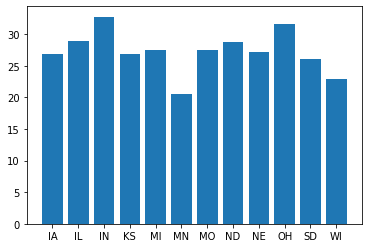

In [32]:
plt.bar(mean_all_ages.index, mean_all_ages.values)

In [33]:
## CDC Alzheimer's Death Rate per state
alzheimers_deathrate = pd.read_csv("Alzheimer's Disease Mortality by State.csv", usecols = ['YEAR','STATE','RATE'])
alzheimers_deathrate.rename(columns = lambda x: x.title(), inplace = True)
midwest_mask = alzheimers_deathrate['State'].apply(lambda x: True if x in midwest else False)
alzheimers_deathrate_midwest = alzheimers_deathrate[midwest_mask]
deathrate_2016 = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == 2016].sort_values(by = 'State')['Rate'].values
deathrate_2016

array([31.3, 25.4, 34.9, 23.1, 33.6, 31.8, 30. , 35.3, 26.2, 33.4, 37.1,
       29.6])

In [34]:
alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == 2017]

Year State  Rate
62  2017    IL  25.6
63  2017    IN  35.3
64  2017    IA  35.3
65  2017    KS  24.3
71  2017    MI  34.5
72  2017    MN  34.9
74  2017    MO  32.3
76  2017    NE  28.5
83  2017    ND  36.5
84  2017    OH  33.6
90  2017    SD  36.9
98  2017    WI  31.6

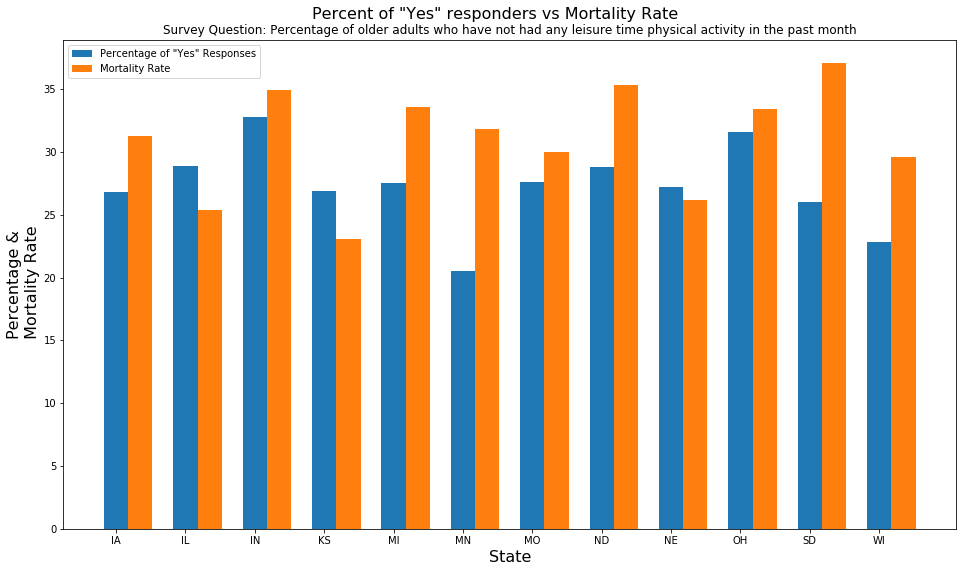

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
ax.bar(np.arange(1,13),mean_all_ages.values, 0.35, label = 'Percentage of "Yes" Responses')
ax.bar(np.arange(1,13) + 0.35,deathrate_2016,0.35, label = 'Mortality Rate')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(mean_all_ages.index)
ax.set_ylabel('Percentage &\n Mortality Rate', fontsize = 16)
ax.set_xlabel('State', fontsize = 16)
ax.legend()
fig.suptitle('Percent of "Yes" responders vs Mortality Rate', y = 0.93, fontsize = 16)
ax.set_title('Survey Question: ' + question)
plt.show()

In [36]:
help(slice)

Help on class slice in module builtins:

class slice(object)
 |  slice(stop)
 |  slice(start, stop[, step])
 |  
 |  Create a slice object.  This is used for extended slicing (e.g. a[0:10:2]).
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  indices(...)
 |      S.indices(len) -> (start, stop, stride)
 |      
 |      Assuming a sequence of length len, calculate the start and stop
 |      indices, and the stride length of the extended slice des

In [37]:
### How do I create DataFrame where Questions are columns? So we can correlate with rate?
year = 2017
# Lets begin by examining one year and averaging out ages
practice_df = alzheimers_midwest[alzheimers_midwest['YearStart'] == year]
table = pd.pivot_table(practice_df, values = 'Data_Value',index = 'LocationAbbr',columns = 'Question',aggfunc=np.mean).dropna(axis = 1)
# Did so using a pivot table. Now, lets try something else. Lets append the rates for 2016
index = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['State'].values
values = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['Rate'].values
series = pd.Series(values,index, name = year)
# join series to table
pd.concat([table,series], axis = 1).corr()[[year]].sort_values(by = year, ascending = False)[1:6]
# Collect questions that correlate best with rate. 


2017
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still...  0.365616
Percentage of older adults who reported influenza vaccine within the past year                        0.299970
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) w...  0.210530
Percentage of older adults who have not had any leisure time physical activity in the past month      0.143261
Percentage of older adults who reported binge drinking within the past 30 days                        0.132906

In [38]:
li = []
for year in [2014,2015,2016,2017]:
    practice_df = alzheimers_midwest[alzheimers_midwest['YearStart'] == year]
    table = pd.pivot_table(practice_df, values = 'Data_Value',index = 'LocationAbbr',columns = 'Question',aggfunc=np.mean).dropna(axis = 1)
    # Did so using a pivot table. Now, lets try something else. Lets append the rates for 2016
    index = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['State'].values
    values = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['Rate'].values
    series = pd.Series(values,index, name = 'Rate')
    # join series to table
    li.extend(list(pd.concat([table,series], axis = 1).corr()[['Rate']].sort_values(by = 'Rate', ascending = False)[1:6].index))


In [39]:
my_dict = {}
for x in li:
    if x in my_dict:
        my_dict[x] += 1
    else:
        my_dict[x] = 1

In [40]:
my_dict

{'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days': 4,
 'Percentage of older adults who reported influenza vaccine within the past year': 2,
 'Percentage of older adult women who are up to date with select clinical preventive services': 2,
 'Percentage of older adults who have fallen and sustained an injury within last year': 1,
 'Percentage of older adults getting sufficient sleep (>6 hours)': 1,
 'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure': 1,
 'Average of 20 or more hours of care per week provided to a friend or family member': 1,
 'Percentage of older adults who have not had any leisure time physical activity in the past month': 3,
 'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities': 1,
 'Percenta

In [41]:
li

['Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
 'Percentage of older adults who reported influenza vaccine within the past year',
 'Percentage of older adult women who are up to date with select clinical preventive services',
 'Percentage of older adults who have fallen and sustained an injury within last year',
 'Percentage of older adults getting sufficient sleep (>6 hours)',
 'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure',
 'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
 'Average of 20 or more hours of care per week provided to a friend or family member',
 'Percentage of older adults who have not had any leisure time physical activity in the past month',
 'Percentage of older adults who reported that as a result of subje

In [42]:
alzheimers[alzheimers['Data_Value'] != alzheimers['Data_Value_Alt']]['Data_Value_Alt'].isna().sum()

6596

In [43]:
# Data_Value and 'Data Value Alt' are the same value. Pandas returns not true when both values are 'NaN'. 
# What rows have missing data values? Do they have similarities?
alzheimers[alzheimers['Data_Value'].isna()]['Question'].value_counts()

Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores    735
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years                                                                       704
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month                                                   642
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months              590
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities                 554
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care

In [44]:
# Which questions are missing data values?
alzheimers['Question'].value_counts()
question_list = list(alzheimers['Question'].values)

In [45]:
questions_list_missing_data = list(alzheimers[alzheimers['Data_Value'].isna()]['Question'].values)

In [46]:
for question in question_list:
    if question not in questions_list_missing_data:
        print(question)

In [47]:
alzheimers[alzheimers['Data_Value'].notnull()]['Question']

0                                            Mean number of days with activity limitations in the past month
1                                                  Percentage of older adults who report having a disability
2                                                  Percentage of older adults who report having a disability
3                                                  Percentage of older adults who report having a disability
4                                         Percentage of older adults with a lifetime diagnosis of depression
                                                        ...                                                 
46671    Percentage of older adults who reported subjective cognitive decline or memory loss that interfe...
46672       Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years
46673    Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) ...
46674    Percentage

In [48]:
missing_question_count = alzheimers[alzheimers['Data_Value'].isna()]['Question'].value_counts()
question_count = alzheimers[alzheimers['Data_Value'].notnull()]['Question'].value_counts()

In [49]:
for question in question_list:
    print(question, 'is missing a data value from \n', str(question_count[question] - missing_question_count[question]), 'records')

Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Mean numbe

 1784 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adult men who are up to date with select 

Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults with subjective cognitive decline or m

Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who are eating 2 or more fruits daily is missing a data value from 
 256 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value 

Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Physically unhealthy days (mean number o

 1770 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease is missing a data value from 
 776 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of a

Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who are 

 752 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Physically unhealthy 

 440 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss t

 132 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who are eating 2 or more fruits daily is missing a data value from 
 256 records
Percentage of at risk adults (ha

Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who are experiencing frequent mental distress is

Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease is missing a data value from 
 776 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease is missing a data value from 
 776 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who had either a home blood stool test within the pa

Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of at risk adults (have diabet

Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 recor

Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults who have ever been told b

 -52 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who reporte

Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who provided care to a friend or family member for six months or more is missing a data value from 
 146 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Av

 1800 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults who self-reported that their health is "fa

 1786 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who have smoked at least 100 cigarettes in thei

 1770 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Mean number of days with activity limitations in t

Percentage of older adults who are eating 2 or more fruits daily is missing a data value from 
 256 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition) is missing a data value from 
 256 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage

Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a 

Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonosco

 132 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a

Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease is missing a data value from 
 776 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Mean 

Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adult men who are up to date with select clinical preventive services is missing a data value from 
 752 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 reco

 1770 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy 

 1786 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who have smoked at least 100 cigarettes in their 

 1800 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a 

Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adult men who are up to date with select clinical preventive services is missing a data value from 
 752 records
Average of 20 or more hours of care per week provided to a friend or family member is mis

Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older

Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease is missing a data value from 
 776 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults who repor

Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who reported binge drinking within the past 30 days is mis

Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition) is missing a data value from 
 256 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who had a cholesterol screening within the past 5 years is missing a data value from 
 1024 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay o

 1022 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adult men who are up to date with select clinical preventive services is missing a data value from 
 752 records
Percentage of older adults who have been told they have high blood pressure who report currently taking me

 1264 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who had either a home blood stool test within the past year or a si

 132 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage 

Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who provided care to a friend or family member for six months or more is missing a data value from 
 146 records
Percentage of older adults who provided care to a friend or family member for six months or more is missing a data value from 
 146 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who reported 

Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults who are eating 2 or more fruits daily is missing a data value from 
 256 records
Percentage of older adults who self-reported that their health is "good", "very good", or "ex

 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percenta

 132 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition) is missing a data value from 
 256 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults with a lifetime diagnosis of depression is missing 

 1800 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults who reported binge drinking w

 1800 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage

Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentag

Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who are eating 2 or more fruits daily is missing a data value from 
 256 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease is missing a data value from 
 776 records
Percentage of older adults who reported subjective cognitive decline or memory loss 

 1784 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adults who ha

Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is 

 440 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance w

Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults wh

 1784 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who have smoked at least 100

Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults who are currently

 1786 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still s

Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years is missing a data value from 
 1014 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 rec

Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value f

 -150 records
Percentage of older adults who provided care to a friend or family member for six months or more is missing a data value from 
 146 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 re

Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who provided care to a friend or family member for six months or more is missing a data value from 
 146 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is mis

Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years is missing a data value from 
 132 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who have ever been told by a health professional that

 1786 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days

 1798 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Percentage of older adults who provided care to a friend or family member for six months or more is missing a data value from 
 146 records
Percentage of older adults who have ever been told by a health professional that they have high blood pressure is missing a data value from 
 1024 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value f

Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adult men who are up to date with select clinical preventive services is missing a data value from 
 752 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800

 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months is missing a data value from 
 140 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adult men who are up to date with select clinical preventive services is missing a data value from 
 752 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults without diabetes who reported a blood sugar or diabete

 1792 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 recor

Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it is missing a data value from 
 -16 records
Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who reported influenza vaccine within the past year is missing a data value from 
 1800 records
Percentage of 

Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years is missing a data value from 
 440 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 

Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adult wome

 1800 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month is missing a data value from 
 -228 records
Percentage of older adults getting sufficient sleep (>6 hours) is missing a data value from 
 776 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who have not had any leisure time physical activity in the past month is missing a data value from 
 1800 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage o

Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adult women who have received a mammogram within the past 2 years is missing a data value from 
 764 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of older adults who reported subjective cognitive decline or memory lo

 1800 records
Mean number of days with activity limitations in the past month is missing a data value from 
 1792 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who report having a disability is missing a data value from 
 1264 records
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days is missing a data value from 
 1786 records
Percentage of older adults who reported binge drinking within 

 1800 records
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores is missing a data value from 
 -150 records
Average of 20 or more hours of care per week provided to a friend or family member is missing a data value from 
 128 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more is missing a data value from 
 1798 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adult men who are up to date with select clinical preventive services is missing a data value from 
 752 records
Percentage of older adults who reported

Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who provided care for a friend or family member within the past month is missing a data value from 
 146 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adults who have fallen and sustained an injury within last year is missing a data value from 
 758 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who have fallen 

Percentage of older adults who are experiencing frequent mental distress is missing a data value from 
 1770 records
Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure is missing a data value from 
 1022 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adult women who are up to date with select clinical preventive services is missing a data value from 
 740 records
Percentage of older adults who reported binge drinking within the past 30 days is missing a data value from 
 1778 records
Percentage of older adults who self-reported that their health is "fair" or "poor" is missing a data value from 
 1800 records
Percentage of older adults who self-reported that their health is "good", "very good", or "excellent" is missing a data value from 
 1800 records
Percentage of older adult women with an 

 764 records
Percentage of older adults with a lifetime diagnosis of depression is missing a data value from 
 1782 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Physically unhealthy days (mean number of days in past month) is missing a data value from 
 1800 records
Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years is missing a data value from 
 632 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine is missing a data value from 
 1784 records
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities is missing a data value from 
 -52 records
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who

In [50]:
alzheimers['Question'].value_counts()

Percentage of older adults with a lifetime diagnosis of depression                                                                                                           1848
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days                                               1848
Mean number of days with activity limitations in the past month                                                                                                              1848
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine                                          1848
Percentage of older adults who self-reported that their health is "fair" or "poor"                                                                                           1848
Percentage of older adults who reported influenza vaccine within the past year                                

In [51]:
dict(alzheimers[alzheimers['Data_Value'].notnull()]['Question'].value_counts())

{'Percentage of older adults who reported influenza vaccine within the past year': 1824,
 'Percentage of older adults who have not had any leisure time physical activity in the past month': 1824,
 'Percentage of older adults who self-reported that their health is "fair" or "poor"': 1824,
 'Physically unhealthy days (mean number of days in past month)': 1824,
 'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"': 1824,
 'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more': 1823,
 'Mean number of days with activity limitations in the past month': 1820,
 'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days': 1817,
 'Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine': 1816,
 'Percentage of older adults with a lifetime diagnosis of depression'

In [52]:
len(alzheimers['Data_Value'].notnull())

46676

In [53]:
# Which questions have least amount of missing information?
dict_questions_total = dict(alzheimers['Question'].value_counts())
dict_questions_non_missing = dict(alzheimers[alzheimers['Data_Value'].notnull()]['Question'].value_counts())

In [54]:
dict_questions_diff = {}
for question in question_list:
    dict_questions_diff[question] = dict_questions_total[question] - dict_questions_non_missing[question]

In [55]:
sorted(dict_questions_diff, key = lambda x: dict_questions_diff.get(x))

['Percentage of older adults who are eating 2 or more fruits daily',
 'Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)',
 'Percentage of older adults who are eating 3 or more vegetables daily',
 'Percentage of older adults getting sufficient sleep (>6 hours)',
 'Percentage of older adult women who have received a mammogram within the past 2 years',
 'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease',
 'Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years',
 'Percentage of older adult men who are up to date with select clinical preventive services',
 'Percentage of older adults who had a cholesterol screening within the past 5 years',
 'Percentage of older adults who have ever been told by a health professional that they have high blood pressure',
 'Percentage of older adults wh

In [56]:
dict_questions_diff.values()

dict_values([28, 160, 33, 24, 17, 35, 24, 39, 24, 590, 13, 8, 8, 17, 16, 24, 704, 464, 16, 32, 554, 462, 25, 344, 24, 455, 536, 642, 8, 14, 455, 4, 31, 7, 20, 735, 4])

In [57]:
pd.Series(dict_questions_diff).sort_values() < 50

Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)     True
Percentage of older adults who are eating 2 or more fruits daily                                                                                                              True
Percentage of older adults who are eating 3 or more vegetables daily                                                                                                          True
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease                                                                                True
Percentage of older adult women who have received a mammogram within the past 2 years                                                                                         True
Percentage of older adults getting sufficient sleep (>6 hours)                                           

In [58]:
# What was the point of listing by questions again? Not sure how helpful this was. 
# Can drop questions with more than 100 missing from data. 
# Some questions only show up in certain years. 
# Limit analysis with questions that show up every year, for year by year comparisons. Limit to questions that only have 50 or less missing data_values
# Only focus on data_values
# Limit analysis to midwestern states (MI, Illinois). 

In [59]:
# Start with 2017, midwestern,


In [60]:
alzheimers_midwest.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Response                      7137
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                       0
Data_Value_Alt                   0
Data_Value_Footnote_Symbol    7137
Data_Value_Footnote           7137
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                   7137
StratificationCategory1          0
Stratification1                  0
StratificationCategory2       7137
Stratification2               7137
StratificationCategory3       7137
Stratification3               7137
GeoLocation                      0
ClassID                          0
TopicID                          0
QuestionID          

In [68]:
# Michigan state individual: How did Michigan respond to different questions?
# Need to make bar graph for each age data_value. Each question is a column? Each row is a age? Sounds right
# First extract Michigan
mi_df = alzheimers_midwest[alzheimers_midwest['LocationAbbr'] == 'MI']
mi_df = mi_df[mi_df['YearStart'] == 2017]
mi_table = pd.pivot_table(mi_df, values = 'Data_Value',index = 'Stratification1', columns = 'Question', aggfunc = np.mean)[['Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
                                                                                                               'Percentage of older adults who self-reported that their health is "fair" or "poor"',
                                                                                                               'Percentage of older adults who have not had any leisure time physical activity in the past month','Physically unhealthy days (mean number of days in past month)']].rename(columns = qdict)

mi_table

Question             Q1    Q2    Q3   Q4
Stratification1                         
50-54 years        22.6  19.7  25.5  5.2
55-59 years        26.3  24.4  31.6  6.6
60-64 years        19.3  23.9  29.3  6.3
65 years or older   9.6  24.7  30.9  5.7

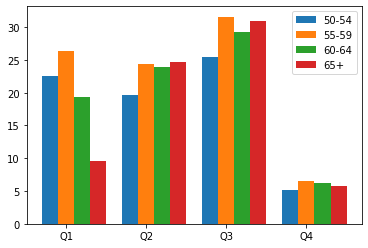

In [69]:
fig, ax = plt.subplots()
x = np.arange(4)
ax.bar(x - .2, mi_table.loc['50-54 years',:].values, width = 0.2, label = '50-54')
ax.bar(x , mi_table.loc['55-59 years',:].values, width = 0.2, label = '55-59')
ax.bar(x + .2, mi_table.loc['60-64 years', :].values, width = 0.2, label = '60-64')
ax.bar(x + .4, mi_table.loc['65 years or older',:].values, width = 0.2, label = '65+')
ax.set_xticks(np.arange(4))
ax.set_xticklabels(mi_table.columns)
ax.legend()
plt.show()


In [63]:
qlist = ['Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
        'Percentage of older adults who self-reported that their health is "fair" or "poor"',
        'Percentage of older adults who have not had any leisure time physical activity in the past month',
        'Physically unhealthy days (mean number of days in past month)']
qnaming = ['Q1','Q2','Q3','Q4']
qdict = dict(zip(qlist,qnaming))
qdict

{'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days': 'Q1',
 'Percentage of older adults who self-reported that their health is "fair" or "poor"': 'Q2',
 'Percentage of older adults who have not had any leisure time physical activity in the past month': 'Q3',
 'Physically unhealthy days (mean number of days in past month)': 'Q4'}

In [64]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same lengt

In [65]:
# Line chart, with questions as lines and y-axis percent, x-axis years. How do we do this?
# Aggregate entire midwest? Or just individual states??? Individual states FOR NOW. Aggregate ages. 
# We have each year an axis, then aggregate questions? Years are columns, index is questions
mi_df = alzheimers_midwest[alzheimers_midwest['LocationAbbr'] == 'MI']
mi_year_table = pd.pivot_table(mi_df, values = 'Data_Value', index = 'Question', columns = 'YearStart', aggfunc = np.mean).loc[qlist,:].rename(index= qdict)
mi_year_table

YearStart    2011    2012    2013    2014    2015    2016    2017
Question                                                         
Q1         19.075  19.600  18.800  17.775  19.275  18.975  19.450
Q2         21.550  20.900  23.350  21.400  22.875  22.350  23.175
Q3         27.150  26.275  26.725  28.525  28.475  27.550  29.325
Q4          5.475   5.275   5.325   5.150   5.375   5.600   5.950

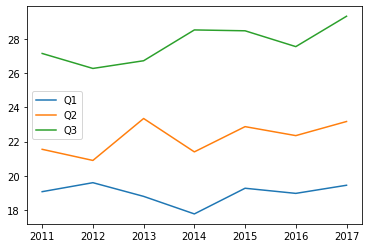

In [66]:
fig, ax = plt.subplots()
ax.plot(mi_year_table.columns, mi_year_table.loc['Q1',:].values, label = 'Q1')
ax.plot(mi_year_table.columns, mi_year_table.loc['Q2',:].values, label = 'Q2')
ax.plot(mi_year_table.columns, mi_year_table.loc['Q3',:].values, label = 'Q3')
ax.legend()
plt.show()

In [67]:
alzheimers.shape

(46676, 38)

In [ ]:
fig, ax = plt.subplots(2,2, sharex = True, sharey = True)
ax[0, 0].plot([1,2,3],[1,2,3])
ax[0, 0].set_xticks([])
fig.set_size_inches(21,12)